# Laporan Proyek IEE3041: Ilmu Data 1
# "Klasifikasi Gerakan Berdasarkan Data Sensor"
## Anggota Kelompok:
- Hizkia Timothy Theodore Lesmana/191900733
- Joy Milliaan/191900104
- Victoriano Aribaldi/191900236

<h2>Tujuan Proyek</h2>
Dalam proyek ini, kelompok kami memperoleh data berupa nilai-nilai bacaan sensor yang ada pada sebuah ponsel pintar. Data ini berbentuk time series. Dengan menggunakan algoritma supervised learning, kami akan membuat model untuk mengklasifikasi pola time series sebuah sensor terhadap label berdiri, duduk, berjalan, berlari, naik tangga, dan turun tangga. <br><br>
Manfaat dari klasifikasi seperti yang kami kerjakan bisa ditemukan di bidang kesehatan, di mana pola gerak seseorang dapat menentukan penyakit seperti stroke, parkinsons, dan lain-lain.

## Pencarian Data
Pada proyek ini, kami menggunakan dataset <b>MotionSense Dataset: Smartphone Sensor Data.</b> Dataset ini mengandung data time series yang diperoleh dari sensor accelerometer dan gyroscope handphone. Data dari sensor ini diperoleh ketika smartphone sedang ada pada orang yang sedang:<br>
- Berdiri<br>
- Duduk <br>
- Berjalan <br>
- Berlari kecil <br>
- Berjalan naik tangga<br>
- Berjalan turun tangga<br>
Sampel data diambil dari 24 orang yang berbeda-beda jenis kelamin, umur, berat bada, dan tinggi badan. <br>

<h3>Proses Akuisisi Data</h3>
1. Setiap orang diberikan satu smartphone iPhone 6 dan diperintahkan untuk melakukan 6 gerakan.<br> 
2. Gerakan dilakukan di lokasi Queen Mary University of London, Mile End Campus.<br>
3. Terdapat dua kali pengambilan data, pertama berdurasi panjang (120-180 detik) dan kedua singkat (30 detik). <br>
4. Sampling dilakukan dengan frekuensi 50Hz.<br>
5. Akuisisi dilakukan menggunakan aplikasi CrowdSense dan <i>framework</i> CMDeviceMotion dari Apple.<br>
6. Diketahui bahwa data sudah terstandardisasi dari aplikasi CrowdSense.<br>

<h3>Fitur Data</h3>
1. Attitude (satu fitur untuk tiap sumbu x, y, z)<br>
2. Gravity (satu fitur untuk tiap sumbu x, y, z)<br>
3. rotationRate (satu fitur untuk tiap sumbu x, y, z)<br>
4. userAcceleration (satu fitur untuk tiap sumbu x, y, z)<br>
Maka itu, terdapat 12 fitur data time series.

<h3>Sumber Data</h3>
- https://github.com/mmalekzadeh/motion-sense<br>
- https://www.kaggle.com/malekzadeh/motionsense-dataset?select=data_subjects_info.csv<br>

<h2>Exploratory Data Analysis</h2>
<h3>Visualisasi Data Time Series Subjek 1</h3>
Berdasarkan visualisasi data, bisa dilihat bahwa data bisa dibagi menjadi tiga kelompok label yaitu standing dan sitting, walking dan jogging, serta upstairs dan downstairs. Pembagian kategori ini dilakukan dengan melihat pola kasar plot domain waktu tiap sensor.

<p align="center"><img src="standsit.jpg" width=600></p>

Pada plot standing dan sitting, perubahan pada nilai sensor sangat kecil. Tentu hal ini logis karena orang yang sedang berdiri ataupun duduk tidak akan melakukan banyak gerakan yang membuat fluktuasi besar pada bacaan sensor.

<p align="center"><img src="walkjog.jpg" width=600></p>

Kemudian pada plot walking dan jogging, terlihat pola gerakan naik-turun yang konsisten. Jika diperhatikan lebih lagi, gelombang yang ada pada plot jogging lebih "padat" dibandingkan plot walking. Hal ini logis karena pada kondisi jogging, terdapat lebih banyak gerakan-gerakan kecil.

<p align="center"><img src="upsdws.jpg" width=600></p>

Lalu pada plot upstairs dan downstairs pola terlihat cukup mirip juga, dengan jarak antar-gelombang yang cukup besar. Tetapi ada satu fitur yang menarik antara plot upstairs dan downstairs yaitu attitude.yaw. Bisa dilihat bahwa attitude yaw untuk upstairs adalah kebalikan dari attitude yaw downstairs. Tentu hal ini logis juga karena gerakan turun tangga mencerminkan gerakan naik tangga.<br>

<h3>Visualisasi Data Domain Frekuensi Subjek 1</h3>

Melalui visualisasi domain frekuensi, kami menemukan beberapa pola yang menunjukkan keterkaitan antara label. Hal ini paling mencolok pada pasangan walking dan jogging. Plot domain frekuensi diperoleh dengan menggunakan method fft (Fast Fourier Transform) dari numpy.

<p align="center"><img src="fstand.jpg" width=500></p>
<p align="center"><img src="fsit.jpg" width=500></p>
<p align="center"><img src="fwalk.jpg" width=500></p>
<p align="center"><img src="fjog.jpg" width=500></p>
<p align="center"><img src="fups.jpg" width=500></p>
<p align="center"><img src="fdws.jpg" width=500></p>
Berdasarkan visualisasi plot dalam domain frekuensi, label standing dan sitting menunjukkan kemiripan di mana keduanya memiliki sinyal hanya pada frekuensi rendah. Lalu label upstairs dan downstairs memiliki spektrum yang lebih besar, tetapi tidak menunjukkan spike/keunikan plot frekuensi. Hasil yang paling mencolok adalah plot f-domain dari walking dan jogging. Walking menunjukkan spike pada beberapa nilai frekuensi. Jogging juga menunjukkan spike yang lebih tersebar sepanjang spektrum. Kedua hal ini logis karena berjalan dan berlari kecil sama-sama melibatkan gerakan yang terulang dan konsisten. Lalu, berlari kecil menunjukkan spektrum frekuensi yang lebih besar karena lari kecil memiliki pengulangan gerakan yang lebih cepat dibandingkan berjalan.

## Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
raw_data_encoded = pd.read_csv("motiondata.csv")
raw_data = raw_data_encoded[["attitude.roll", "attitude.pitch", "attitude.yaw", 
                             "gravity.x", "gravity.y", "gravity.z", 
                             "rotationRate.x", "rotationRate.y", "rotationRate.z", 
                             "userAcceleration.x", "userAcceleration.y", "userAcceleration.z"]]
raw_result = raw_data_encoded[["std", "sit", "wlk", "jog", "ups", "dws"]]

In [5]:
label_data = pd.read_csv("motiondata_rev.csv")

[0.1265595  0.12245463 0.2422502  0.11492203 0.16133435 0.05298475
 0.05058766 0.04046224 0.03299102 0.05545362]


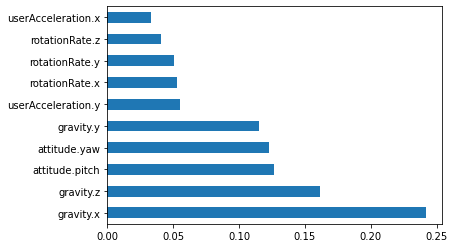

In [32]:
# Feature Importance
X = label_data.iloc[:, 1:-7]  #independent columns
y = label_data.iloc[:,-6:]    #target column
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Training & Model Tuning

### KNN

Untuk mencari tipe model K Nearest Neighbours terbaik, kami menggunakan tiga metric: Manhattan, Euclidean, dan Minkowski, dengan parameter n konstan dengan besar 5. <br>
Untuk melihat jika ada nilai n yang lebih baik daripada 5, akan dilakukan grid search dengan parameter n = [3, 4, ... , 10] dan p = [1, 1.1, 1.2, ... ,2]. <br>
Hasil akan ditinjau dari perbandingan confusion matrix dengan test, serta accuracy score yang dihasilkan. Confusion matrix akan memiliki lima hasil, masing-masing merupakan perbandingan dari label hasil yang diinginkan. Urutannya dari paling atas: std, sit, wlk, jog, ups, dws.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

__Manhattan__ <br>
Setara dengan metode minkowski dengan p = 1

In [29]:
# Pembuatan Model
classifier_manhattan = KNeighborsClassifier(n_neighbors = 5, metric ='manhattan', p = 1) #'minkowski', 'manhattan'. Referensi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
classifier_manhattan.fit(X_train, y_train)

# Prediksi
y_pred_manhattan = classifier_manhattan.predict(X_test)

# Confusion Matrix
man_mlcm = multilabel_confusion_matrix(y_test, y_pred_manhattan)
print("Confusion Matrix Metode Manhattan:")
print(man_mlcm)
print()
print("Accuracy Score Metode Manhattan:")
print(accuracy_score(y_test, y_pred_manhattan))
print()

Confusion Matrix Metode Manhattan:
[[[2972    1]
  [   0  627]]

 [[3031    0]
  [   0  569]]

 [[2948   40]
  [  19  593]]

 [[3010    7]
  [  23  560]]

 [[2936   19]
  [  34  611]]

 [[3034    2]
  [  13  551]]]

Accuracy Score Metode Manhattan:
0.9752777777777778



__Eucidean__<br>
Setara dengan Manhattan dengan p = 2

In [30]:
# Pembuatan model
classifier_euc = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p = 2)
classifier_euc.fit(X_train, y_train)

# Prediksi
y_pred_euc = classifier_euc.predict(X_test)

# Confusion Matrix
euc_mlcm = multilabel_confusion_matrix(y_test, y_pred_euc)
print("Confusion Matrix Metode Euclidean:")
print(euc_mlcm)
print()
print("Accuracy Score Metode Euclidean:")
print(accuracy_score(y_test, y_pred_euc))
print()

Confusion Matrix Metode Euclidean:
[[[2972    1]
  [   0  627]]

 [[3031    0]
  [   0  569]]

 [[2941   47]
  [  35  577]]

 [[3008    9]
  [  34  549]]

 [[2914   41]
  [  44  601]]

 [[3030    6]
  [  19  545]]]

Accuracy Score Metode Euclidean:
0.9633333333333334



__Minkowski__<br>
Model akan dibuat dengan menggunakan 4 buat p : 3, 5, 7, dan 9.

In [31]:
param_p = [3,5,7,9]
for p in param_p:
    classifier_manhattan = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = p) #'minkowski', 'manhattan'. Referensi: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
    classifier_manhattan.fit(X_train, y_train)
    y_pred_manhattan = classifier_manhattan.predict(X_test)

    min_mlcm = multilabel_confusion_matrix(y_test, y_pred_manhattan)
    print("p :", p)
    print("Confusion Matrix:")
    print(min_mlcm)
    print()
    print("Accuracy Score")
    print(accuracy_score(y_test, y_pred_manhattan))
    print("\n")

p : 3
Confusion Matrix:
[[[2971    2]
  [   0  627]]

 [[3031    0]
  [   0  569]]

 [[2936   52]
  [  37  575]]

 [[3005   12]
  [  43  540]]

 [[2904   51]
  [  49  596]]

 [[3028    8]
  [  26  538]]]

Accuracy Score
0.9569444444444445


p : 5
Confusion Matrix:
[[[2972    1]
  [   0  627]]

 [[3029    2]
  [   0  569]]

 [[2928   60]
  [  38  574]]

 [[3002   15]
  [  50  533]]

 [[2904   51]
  [  55  590]]

 [[3027    9]
  [  31  533]]]

Accuracy Score
0.9516666666666667


p : 7
Confusion Matrix:
[[[2972    1]
  [   0  627]]

 [[3029    2]
  [   0  569]]

 [[2925   63]
  [  36  576]]

 [[3002   15]
  [  53  530]]

 [[2907   48]
  [  59  586]]

 [[3026   10]
  [  32  532]]]

Accuracy Score
0.95


p : 9
Confusion Matrix:
[[[2971    2]
  [   0  627]]

 [[3029    2]
  [   0  569]]

 [[2924   64]
  [  36  576]]

 [[3002   15]
  [  53  530]]

 [[2905   50]
  [  62  583]]

 [[3025   11]
  [  32  532]]]

Accuracy Score
0.9491666666666667




Untuk mencari metode yang terbaik, akan dilakukan Grid Search dan plotting menggunakan looping.<br>

__Grid Search:__

In [33]:
from sklearn.model_selection import GridSearchCV

# Pembuatan model
kn = KNeighborsClassifier(metric='minkowski')
params = {
    'n_neighbors' : [i for i in range(3,10,1)],
    'p': np.linspace(1,2,21)
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

# Prediksi
grid_kn.fit(X_train, y_train)
y_pred_grid = grid_kn.predict(X_test)

# Confusion matrix
man_mlcm = multilabel_confusion_matrix(y_test, y_pred_grid)
print("Confusion Matrix:")
print(man_mlcm)
print()
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_grid))
print()
print("Best Parameter:")
print(grid_kn.best_params_)
print()

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Confusion Matrix:
[[[2972    1]
  [   0  627]]

 [[3031    0]
  [   0  569]]

 [[2949   39]
  [  17  595]]

 [[3012    5]
  [  20  563]]

 [[2937   18]
  [  31  614]]

 [[3032    4]
  [  10  554]]]

Accuracy Score:
0.9783333333333334

Best Parameter:
{'n_neighbors': 3, 'p': 1.0}



__Looping:__<br>
Looping dilakukan dengan mengganti nilai p.<br>
Tiap iterasi, nilai p bertambah sebesar 0.1 dengan nilai awal 1 dan nilai akhir 10.

Text(0.5, 0, 'p')

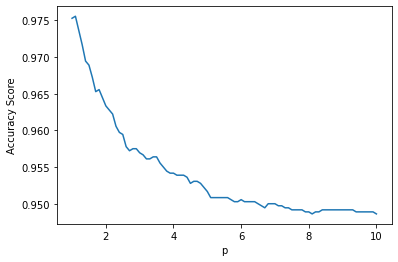

In [34]:
list_acc_score = []

for p in np.linspace(1,10,91): #numpy.linspace(start, stop, number,...)
    knn =  KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = p)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    list_acc_score.append(accuracy_score(y_test, y_pred_knn))

    
sns.lineplot(x=np.linspace(1,10,91),y=list_acc_score)
plt.ylabel("Accuracy Score")
plt.xlabel("p")
    

In [36]:
# Pembuatan model
classifier_best_l = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1.1)
classifier_best_l.fit(X_train, y_train)

# Prediksi
y_pred_best_l = classifier_best.predict(X_test)

# Confusion Matrix
best_l_mlcm = multilabel_confusion_matrix(y_test, y_pred_best_l)
print("Confusion Matrix Menurut Hasil Looping:")
print(best_l_mlcm)
print()
print("Accuracy Score Menurut Hasil Looping:")
print(accuracy_score(y_test, y_pred_best_l))
print()

Confusion Matrix Menurut Hasil Looping:
[[[2972    1]
  [   0  627]]

 [[3031    0]
  [   0  569]]

 [[2949   39]
  [  17  595]]

 [[3012    5]
  [  20  563]]

 [[2937   18]
  [  31  614]]

 [[3032    4]
  [  10  554]]]

Accuracy Score Menurut Hasil Looping:
0.9783333333333334



__Kesimpulan__<br>
Terlihat matrix yang terbaik mendekati matrix Manhattan (Minkowski p = 1) yakni Minkowski dengan nilai p = 1.1<br>
Matrix tersebut memiliki nilai accuracy score 0.9783 yang merupakan nilai tertinggi pada grafik plotting. Nilai tersebut juga sama dengan nilai yang ditemukan dengan menggunakan hasil Grid Search dengan mengganti nilai n menjadi 3 dan nilai p menjadi 1.<br>
Terlihat parameter terbaik untuk KNN adalah:<br>
- n_neighbour = 3
- p = 1
<br>

atau
- n_neighbour = 5
- p = 1.1 

## SVM

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR,LinearSVR
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
Y_train = np.where(y_train)[1]
Y_test = np.where(y_test)[1]
print(y_train)

#Membagi data menjadi split dan test

In [ ]:
base_model = SVR()
base_model.fit(X_train,Y_train)
base_preds = base_model.predict(X_test)
mean_absolute_error(Y_test,base_preds)
np.sqrt(mean_squared_error(Y_test,base_preds))
y_test.mean()

#Membuat base momdel dan beberapa perhitungan

In [ ]:
param_grid = {'C':[0.01,0.1,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['auto'],
              'degree':[2,3,4],
              'epsilon':[0.01,0.1,1,2]}
from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)
grid.fit(X_train,Y_train)

In [ ]:
GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'degree': [2, 3, 4],
                         'epsilon': [0.01, 0.1, 1, 2], 'gamma': ['auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
print(grid.best_params_)

In [ ]:
{'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}

In [ ]:
grid_preds = grid.predict(X_test)
print("MAE: ", mean_absolute_error(Y_test,grid_preds))
print("MSE", np.sqrt(mean_squared_error(Y_test,grid_preds)))

In [ ]:
MAE: 0.23523412757763323
MSE: 0.42623834438997393

Sebuah supervised learning dengan Klasifikasi SVM serta Program Regresi kali ini bekerja pada data yang linear, regresi ini digunakan untuk menggabung banyak instance, serta meminimalisasi margin violation. Hyper-parameter yang baaik digunakan oleh Gridsearch SVM adalah: C = 1, Degree = 2, Epsilon = 0.1, Gamma=auto, Kernel=rbf. 

<h2>Data Preprocessing (Khusus Algoritma Time Series)</h2>
Data time series memiliki satu ciri khusus dibandingkan dengan jenis data lain yaitu kontinuitas. Sebuah data time series baru akan bermakna/memiliki informasi yang jelas ketika diurutkan berdasarkan waktu. Maka itu, untuk mendapatkan klasifikasi yang lebih akurat, dibutuhkan algoritma klasifikasi yang menerima input berupa satu seri data, bukan satu titik data saja. Tidak hanya itu, input seri data juga merupakan data multivariabel (12 fitur). 
<br>
<br>
Untuk klasifikasi data khusus time series, kami menggunakan library `pyts`. Dalam library ini, terdapat class untuk klasifikasi data time series multivariabel yaitu `pyts.multivariate.classification.MultivariateClassifier`. Bentuk data yang menjadi input (x) bagi algoritma-algoritma classifier time series adalah matriks 3-D dengan dimensi sampel, fitur, dan titik-titik data.
<br> 
<br>
Berikut adalah ilustrasi format data yang diterima:

<p align="center"><img src="timeseries_data_format.jpg" width="500"></p><br>

Tentu saja, tetap ada bagian y dengan panjang sama dengan jumlah sampel data yang berupa matriks 1 dimensi yang <b>label-encoded</b>.<br>
Untuk setiap model time series, digunakan <b>train sebesar 0.75</b> dan <b>test sebesar 0.25.</b>
<br>

<h4>Alternatif GridSearchCV</h4>
Pada kasus data time series, kami tidak menggunakan model dari sklearn. Selain itu, model dibentuk sebagai subclass dari kelas `MultivariateClassifier`. Maka itu, kami tidak bisa menggunakan modul `GridSearchCV` dari `sklearn`. Maka itu, kami akan mengimplementasikan kode yang fungsinya sama dengan `GridSearchCV` yaitu dengan mencoba setiap kombinasi hyperparameter menggunakan nested loop.

<br>
Dua algoritma klasifikasi time series yang digunakan dalam proyek ini adalah BOSSVS dan TimeSeriesForest.<br><br>

<h4>Kode untuk membentuk format data yang sesuai dengan pyts dan train test split:</h4>

In [23]:
# Libraries & Modules yang digunakan:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from pyts.multivariate.classification import MultivariateClassifier
from pyts.classification import BOSSVS, KNeighborsClassifier, TimeSeriesForest
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
bigmat = []
labels = []
def filedir(folder, sample):
    return f"data/long_trials/{folder}/sub_{sample}.csv"

list_of_dir = ["standing", "sitting", "walking", "jogging", "upstairs", "downstairs"]

for label in list_of_dir:
    for sample_n in range(1, 25):
        sample_list = []
        file_loc = filedir(label, sample_n)
        current_file = pd.read_csv(file_loc).iloc[:800, 1:]
        columns = current_file.columns
        for col in columns:
            sample_list.append(current_file[col])
        labels.append(label)
        bigmat.append(sample_list)
bigmat = np.array(bigmat)
labels = np.array(labels)

# Random State Manual
# Data bigmat (x) dan labels (y) harus memiliki posisi setelah shuffle yang sama.
bigmat_shuffle, labels_shuffle = shuffle(bigmat, labels)

# Train Test Split Manual
train = 0.75
test = 1 - train
train_size = int(len(bigmat_shuffle) * train)
x_train = bigmat_shuffle[:train_size]
y_train = labels_shuffle[:train_size]
x_test = bigmat_shuffle[train_size:]
y_test = labels_shuffle[train_size:]

### Time Series BOSSVS (Bag of SFA Symbols in Vector Space)
1. Time series diubah menjadi bentuk histogram menggunakan algoritma Bag-of-SFA Symbols (BOSS)
2. Untuk tiap kelas, histogram yang ada dijumlahkan dan dihitung vektor TF-IDF 
3. Prediksi kelas untuk sampel baru adalah kelas dengan cosine similarity paling tinggi antara TF-vector sampel baru dengan TF-IDF vektor tiap kelas.
<br>
#### Hyperparameters:
- word size
- n bins
<br>
#### Model Tuning: 
- word size: [2, 4, 8]
- n bins: [2, 4, 8]<br>
Dilakukan 9 kali pembuatan model dengan hyperparameter berbeda. <br>

In [ ]:
word_size = [2, 4, 8]
n_bins = [2, 4, 8]
word_sizes_conf_mat = []
boss_clf_report = []
boss_conf_mat = []
for word in word_size:
    for n_bin in n_bins:
        clf_boss = MultivariateClassifier(BOSSVS(word_size=word, n_bins=n_bin))
        clf_boss.fit(x_train, y_train)
        pred = clf_boss.predict(x_test)
        clf_report = classification_report(y_test, pred)
        conf_mat = confusion_matrix(y_test, pred)
        boss_conf_mat.append(conf_mat)
        boss_clf_report.append(clf_report)

In [ ]:
count = 0
for word in word_size:
    for n_bin in n_bins:
        print(f"Word Size: {word}, N-bins: {n_bin}")
        print("  Confusion Matrix")
        print(boss_conf_mat[count])
        print("  Classification Report")
        print(boss_clf_report[count])
        count+=1
        print("==========================================")

<h4>Hasil Perbandingan Hyperparameter BOSSVS</h4>
(Hanya ditampilkan nilai terbaik)

In [ ]:
==========================================
Word Size: 4, N-bins: 8
  Confusion Matrix
[[4 1 1 0 0 1]
 [0 8 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 1 4 0 0]
 [1 1 0 0 3 1]
 [0 1 0 0 0 4]]
  Classification Report
              precision    recall  f1-score   support

  downstairs       0.80      0.57      0.67         7
     jogging       0.73      1.00      0.84         8
     sitting       0.71      1.00      0.83         5
    standing       1.00      0.80      0.89         5
    upstairs       1.00      0.50      0.67         6
     walking       0.67      0.80      0.73         5

    accuracy                           0.78        36
   macro avg       0.82      0.78      0.77        36
weighted avg       0.81      0.78      0.77        36

==========================================

<h4>Kesimpulan Time Series BOSSVS</h4>

Berdasarkan kombinasi hyperparameter word size dan n bins yang dilakukan, ditemukan hasil paling baik ada pada:<br>
- word size = 4 <br>
- n bins = 8 <br>

<b>Dengan hasil:</b><br>
- Accuracy: 78%<br>
- Precision: 82%<br>
- Recall: 78%<br>
- F1-Score:77%<br>

Karena dimensionalitas tinggi dan ketergantungan pada seri data (tidak bisa satu titik data saja), kami tidak bisa memberikan visualisasi hasil klasifikasi BOSSVS. 

<h3>Time Series Random Forest</h3>
<h4>Hyperparameters</h4>
- n_estimators: jumlah decision tree dalam random forest<br>
- n_windows: jumlah window (subset dari time series)<br>

<h4>Hyperparameter Tuning</h4>
- n_estimators: [10, 50, 100]<br>
- n_windows: [1, 2, 4]<br>
Terdapat 9 kombinasi hyperparameter.

In [ ]:
for rf_est in [10, 50, 100]:
    for n_win in [1, 2, 4]:
        clf_tf = MultivariateClassifier(TimeSeriesForest(n_estimators=rf_est, n_windows=n_win))
        clf_tf.fit(x_train, y_train)
        pred = clf_tf.predict(x_test)
        clf_report = classification_report(y_test, pred)
        conf_mat = confusion_matrix(y_test, pred)
        print(f"n_estimators: {rf_est}, n_windows: {n_win}")
        print(conf_mat)
        print(clf_report)
        print("===================================")

<h4>Hasil Perbandingan Hyperparameter TimeSeriesForest</h4>
(Hanya ditampilkan nilai terbaik)

In [ ]:
===================================
n_estimators: 50, n_windows: 4
[[6 0 0 1 0 0]
 [0 7 0 0 0 1]
 [0 0 4 1 0 0]
 [0 0 1 4 0 0]
 [2 0 0 0 3 1]
 [0 0 0 0 0 5]]
              precision    recall  f1-score   support

  downstairs       0.75      0.86      0.80         7
     jogging       1.00      0.88      0.93         8
     sitting       0.80      0.80      0.80         5
    standing       0.67      0.80      0.73         5
    upstairs       1.00      0.50      0.67         6
     walking       0.71      1.00      0.83         5

    accuracy                           0.81        36
   macro avg       0.82      0.81      0.79        36
weighted avg       0.84      0.81      0.80        36

===================================

<h4>Kesimpulan Time Series Random Forest</h4>
Berdasarkan penentuan hyperparameter n_estimators dan n_windows, ditemukan bahwa nilai terbaik terjadi ketika:<br>
- n_estimators = 50<br>
- n_windows = 4<br>

<b>Dengan hasil:</b><br>
- Accuracy: 81%<br>
- Precision: 82%<br>
- Recall: 81%<br>
- F1-Score: 79%<br>

Karena dimensionalitas tinggi dan ketergantungan pada seri data (tidak bisa satu titik data saja), kami tidak bisa memberikan visualisasi hasil klasifikasi Time Series Random Forest. 